In [1]:
from zipfile import ZipFile
filename = "/content/ADNI1_Baseline 3T (1).zip"

with ZipFile(filename,'r') as zip:
  print("Extracting of the file ...")
  zip.extractall()
  print("Done")

Extracting of the file ...
Done


In [8]:
import glob

images_paths = []

for i in glob.iglob( '**/*.nii', recursive=True):
  images_paths.append('/content/'+i)

In [9]:
import nibabel as nib
import matplotlib.pyplot as plt
dataset =[]
lables = ['CN','MCI' ,'CN' ,'MCI' ,'CN' ,'MCI' ,'AD' ,'AD' ,'CN' ,'MCI' ]

for i in images_paths:
  image = nib.load(i)
  image = image.get_data()
  c = image.copy()
  c.resize(240, 256,160)
  dataset.append(c)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


Text(0.5, 0.98, 'Center slices for anatomical image')

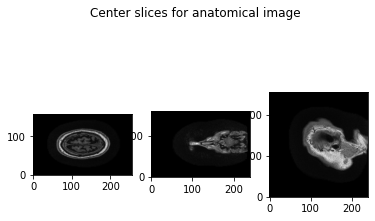

In [11]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
show_slices([dataset[7][50, :, :],
             dataset[7][:, 34, :],
             dataset[7][:, :, 140]])
plt.suptitle("Center slices for anatomical image")  

In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical


Training_images = dataset[:7]
Training_labels = lables[:7]
Testing_images = dataset[7:10]
Testing_labels = lables[7:10]

Training_images_np = np.array(Training_images) 
Training_labels_np = np.array(Training_labels)
Testing_images_np = np.array(Testing_images) 
Testing_labels_np = np.array(Testing_labels)

In [13]:
Training_images_np = Training_images_np/255.00
Testing_images_np = Testing_images_np/255.00

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Training_labels_np = label_encoder.fit_transform(Training_labels_np)


label_encoder = LabelEncoder()
Testing_labels_np = label_encoder.fit_transform(Testing_labels_np)


Training_labels_np = to_categorical(Training_labels_np)
Testing_labels_np = to_categorical(Testing_labels_np)

#aug_traning_images = np.expand_dims(aug_traning_images, axis=-1)
#aug_testing_images = np.expand_dims(aug_testing_images, axis=-1)


print(Training_images_np.shape)
print(Training_labels_np.shape)
print(Testing_images_np.shape)
print(Testing_labels_np.shape)

(7, 240, 256, 160)
(7, 3)
(3, 240, 256, 160)
(3, 3)


In [14]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
def Alzheimer_Data_Augmentation(input_shape=(240, 256, 160)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu'))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))
    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu'))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu'))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model= Alzheimer_Data_Augmentation(input_shape=(240, 256, 160))
model.summary()

hist_ = model.fit(Training_images_np, Training_labels_np, batch_size=1, epochs=10, validation_data=(Testing_images_np, Testing_labels_np))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 240, 256, 128)     512128    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 83, 128)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 78, 83, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 26, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 24, 26, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 11, 32)       0

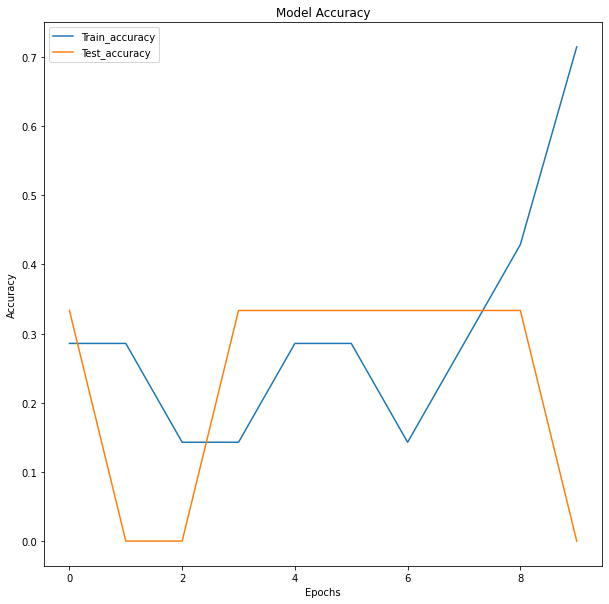

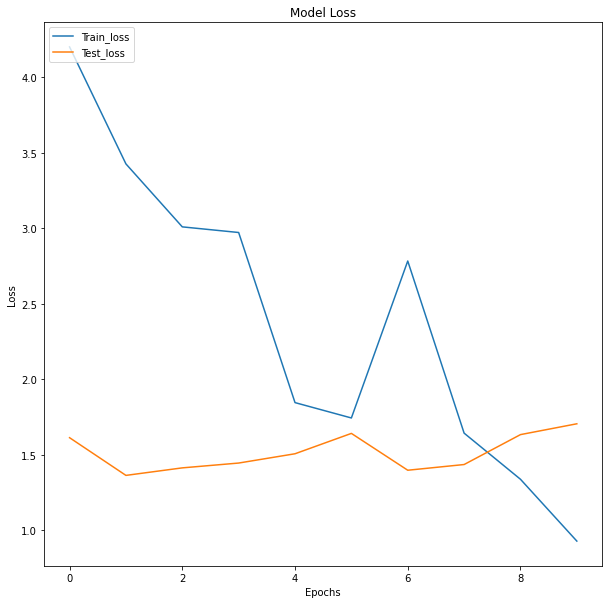

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['accuracy'], label='Train_accuracy')
plt.plot(hist_.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['loss'], label='Train_loss')
plt.plot(hist_.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

from sklearn.metrics import classification_report

ypred = model.predict(Testing_images_np)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(Testing_labels_np, axis=1)
print(classification_report(y_test_pred, ypred))